In [194]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [195]:
mnist_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
urllib.request.urlretrieve(mnist_url, "mnist.npz")

# Load the npz file
data = np.load("mnist.npz")

In [196]:
train_images = data['x_train']
train_labels = data['y_train']

num_labels = len(np.unique(train_labels))
num_train_images = len(train_images)
print("Number of unique labels:", num_labels)
print("Size of training set:", num_train_images)


Number of unique labels: 10
Size of training set: 60000


In [197]:
train_images = train_images.reshape(train_images.shape[0], -1)
num_features = train_images.shape[1]
print("Number of pixels in each image:", num_features)

Number of pixels in each image: 784


In [198]:
X = []
for i in range(num_labels):
    counter = 0
    for j in range(num_train_images):
        if train_labels[j] == i:
            counter += 1
            X.append(train_images[j])
        
        if counter == 100:
            break
X = np.array(X)
X = X.T
X.shape

(784, 1000)

In [199]:
mean = np.mean(X, axis=1)
X_cen = (X.T - mean.T).T
X_cen.shape

(784, 1000)

In [200]:
S = X_cen @ X_cen.T
S = S / 999
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(S)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
U = np.array(sorted_eigenvectors)
U

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
Y = (U.T) @ X_cen
X_recon = U @ Y
X_recon

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [203]:
def mean_squared_error(matrix1, matrix2):
    # Calculate the squared difference between corresponding elements
    squared_diff = (matrix1 - matrix2) ** 2
    
    # Calculate the mean squared error
    mse = np.mean(squared_diff)
    
    return mse

In [204]:
MSE = mean_squared_error(X_cen, X_recon)
print(MSE)

1.4250197019517972e-26


In [205]:
def give_Up(p):
    return U[:, :p]

In [206]:
def reconstructImage(p):
    Up = U[:, :p]
    Yp = Up.T @ X_cen
    image_recon = Up @ Yp
    print(Yp.shape)
    image_recon = (image_recon.T + mean.T).T
    image_recon = image_recon.reshape(28, 28, 1000)
    return image_recon

In [207]:
def plotImage(p):
    image_recon = reconstructImage(p)
    offset = 0
    plt.figure(figsize=(15, 10))
    for i in range(10):
        for j in range(5):
            plt.subplot(10, 5, i * 5 + j + 1)  # Corrected subplot index calculation
            plt.imshow(image_recon[:, :, j + offset], cmap='gray')
            plt.axis('off')
            plt.title("Class {}".format(i))
        offset += 100

    plt.tight_layout()
    plt.show()

(100, 1000)


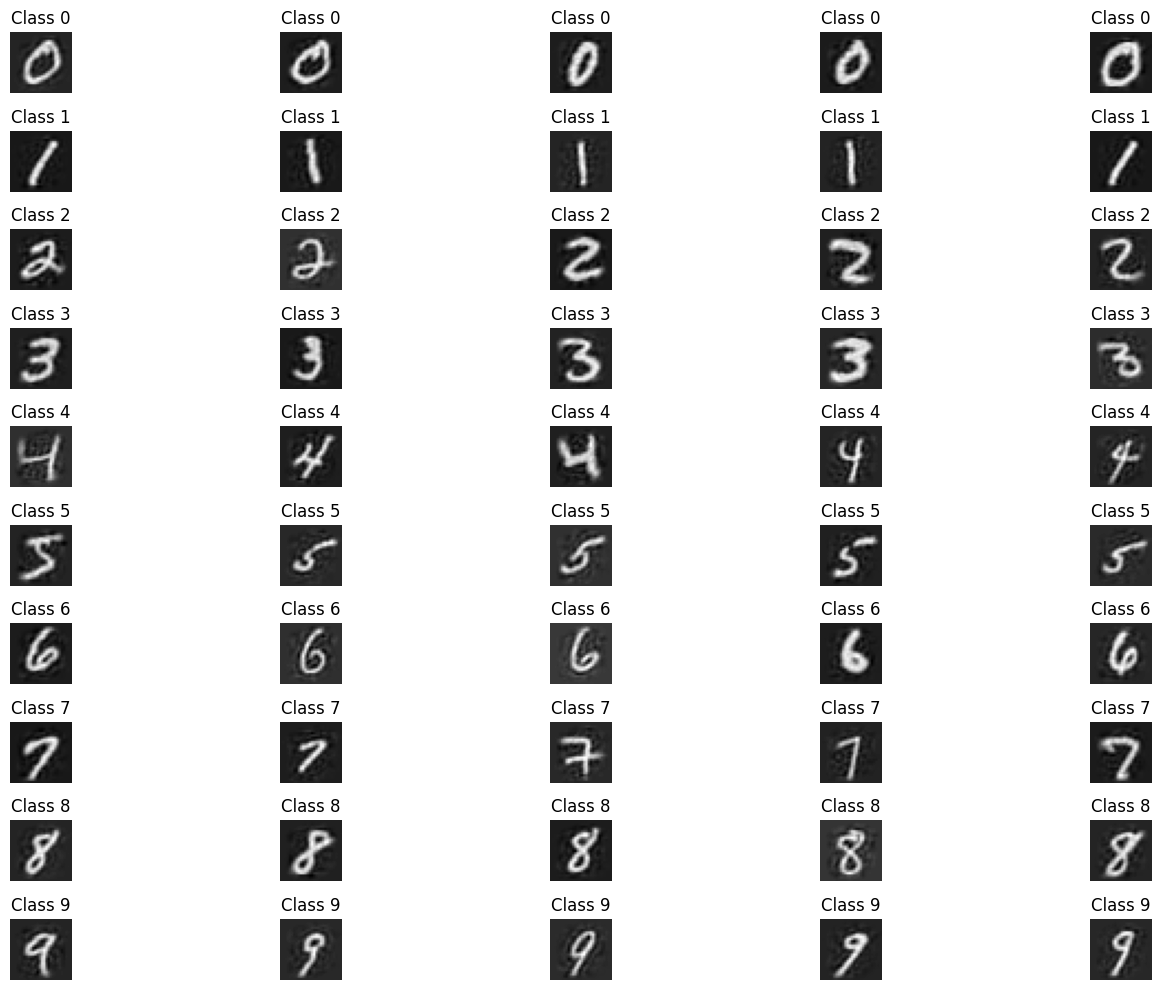

In [208]:
p = 100
plotImage(p)
#Change the value of the parameter p in the range [1, 784] to produce different results

In [209]:
train_images = data['x_train']
train_images = train_images.reshape(-1, 784).T
mean_X_test = np.mean(train_images, axis=1, keepdims=True)
X_train_cen = train_images - mean_X_test

In [210]:
Up = give_Up(p)
Yp = Up.T @ X_train_cen
Yp = Yp.T
Yp.shape


(60000, 100)

In [211]:
class_means = []
class_inv_covs = []
for i in range(num_labels):
    mask = (train_labels == i)
    selected_rows = Yp[mask]
    # print(selected_rows)
    mean = np.mean(selected_rows, axis=0)
    cov = np.cov(selected_rows, rowvar=False)
    class_means.append(mean)
    inv_cov = np.linalg.pinv(cov)
    class_inv_covs.append(inv_cov)

class_means = np.array(class_means)
class_inv_covs = np.array(class_inv_covs)
print(class_means.shape)
for i in class_means:
    print(i)

(10, 100)
[ 9.97795853e+02  9.06766492e+01  1.29981981e+02  8.34165047e+01
  2.45426672e+02  4.54876341e+02 -1.78442888e+02  1.26789945e+02
  1.05394864e+02  1.64829162e+02  3.54407723e+01 -3.85339380e+01
  2.03461583e+01 -1.97600802e+01 -9.62585658e-01 -1.75508386e+01
  4.55090867e+00  5.25928310e+01 -3.70890670e+01 -1.50091026e+01
 -2.33667329e+01 -4.77775723e+01  3.73669177e+01  3.44784688e+01
  9.03732996e+00 -1.76919636e+01 -1.75815117e+00 -2.13763597e+00
  4.59926526e+01 -2.23080587e+01 -2.34142883e+01 -5.46158316e+00
 -1.27879867e+01 -4.92100992e+00  3.34982754e+00  2.86067966e+01
 -5.41052633e+00  2.39000249e+01  1.87568174e+01  9.28972487e+00
  6.31345547e+00 -5.60216280e-01  2.70490330e+01 -4.51290203e+01
 -2.27240105e+01  4.11920697e+00 -3.41649041e+01 -6.06644632e+00
  3.84593909e+00 -1.62361092e+01  8.08704584e+00  9.41739838e+00
  1.65084659e+01 -3.13443659e+01  1.61991611e+01  1.36551536e+01
  5.11803737e+00 -1.69137817e+01 -8.70288137e+00  1.41999044e+01
 -1.59987145e+0

In [212]:
def QDA(x, mean, inv, priori):
    ans = - 0.5 * ((x @ inv @ (x.T)) - 2 * (mean @ inv @ (x.T)) + (mean @ inv @ (mean.T))) + np.log(priori)
    return ans

In [213]:
def max_QDA(x):
    max_label = 0
    maximum_QDA = QDA(x, class_means[0], class_inv_covs[0], 0.1)
    for i in range(1, num_labels):
        class_QDA = QDA(x, class_means[i], class_inv_covs[i], 0.1)
        # print(class_means[i])
        if class_QDA > maximum_QDA:
            # print("yo")

            max_label = i
            maximum_QDA = class_QDA
    return max_label

In [214]:
test_images = data['x_test']
test_labels = data['y_test']

In [215]:
test_images = test_images.reshape(-1, 784).T
mean_X_test = np.mean(test_images, axis=1, keepdims=True)
X_test_cen = test_images -mean_X_test
X_test_cen

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [216]:
Y_test = Up.T @ X_test_cen
Y_test = Y_test.T
num_tests = len(Y_test)
Y_test.shape

(10000, 100)

In [217]:
samples_per_label = [0]*10
classifications_per_label = [0]*10
correct_classification = 0
for i in range(len(Y_test)):
    classfied_label = max_QDA(Y_test[i])
    correct_label = test_labels[i]
    if classfied_label == correct_label:
        correct_classification += 1
        classifications_per_label[correct_label] += 1
    samples_per_label[correct_label] += 1
    print("correct classifications:", correct_classification, " total samples tested:", i+1)
accuracy = (correct_classification / num_tests) * 100
print("Accuracy: {:.2f}%".format(accuracy))

correct classifications: 1  total samples tested: 1
correct classifications: 2  total samples tested: 2
correct classifications: 3  total samples tested: 3
correct classifications: 4  total samples tested: 4
correct classifications: 5  total samples tested: 5
correct classifications: 6  total samples tested: 6
correct classifications: 7  total samples tested: 7
correct classifications: 7  total samples tested: 8
correct classifications: 8  total samples tested: 9
correct classifications: 9  total samples tested: 10
correct classifications: 10  total samples tested: 11
correct classifications: 11  total samples tested: 12
correct classifications: 12  total samples tested: 13
correct classifications: 13  total samples tested: 14
correct classifications: 14  total samples tested: 15
correct classifications: 15  total samples tested: 16
correct classifications: 16  total samples tested: 17
correct classifications: 17  total samples tested: 18
correct classifications: 18  total samples test

In [218]:
for i in range(num_labels):
    label_accuracy = (classifications_per_label[i]/samples_per_label[i])*100
    print("Label {:01d}:".format(i), "{:.2f}%".format(label_accuracy))

Label 0: 97.96%
Label 1: 76.39%
Label 2: 97.00%
Label 3: 93.27%
Label 4: 97.66%
Label 5: 94.51%
Label 6: 91.13%
Label 7: 88.62%
Label 8: 97.43%
Label 9: 90.29%
